In [1]:
#This section read the csv data into a DataFrame in pandas

import pandas as pd
import requests
import numpy as np
import json
import matplotlib.pyplot as plt
import hvplot.pandas

path = 'DataScience_salaries_2024.csv'

salaries_df = pd.read_csv(path)

salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


# What job titles have the highest salaries? 

In [2]:
# We copy the salaries DataFrame into a new one that we can modify 
top_salaries_df = salaries_df.copy()
#Eliminate any duplicated data
top_salaries_df.drop_duplicates()
# Create a groupby df with the count of each job title 
titles_count_df = top_salaries_df.groupby('job_title').size().reset_index(name='count')
# Sort the values by highest count to lowest
titles_count_df = titles_count_df.sort_values(by='count', ascending=False)
# Export Result
titles_count_df.to_csv('csv_output/job_title_count.csv', index=False)


# Having this new df we can filter out all jobs that do not meet certain count criteria

titles_count_df_fil = titles_count_df[titles_count_df['count'] >= 20]

titles_count_df_fil.to_csv('csv_output/job_title_count_filtered.csv', index=False)

In [3]:
#considering the filtered job title count dataframe we can now categorize each job title 
data_engineering = [
    "Data Engineer", 
    "Data Architect", 
    "Data Developer", 
    "ETL Developer", 
    "Data Integration Engineer", 
    "Data Modeler", 
    "Data Product Manager", 
    "Data Developer", 
    "ETL Developer", 
    "Data Integration Engineer"
]
data_science = [
    "Data Scientist", 
    "Research Scientist", 
    "Applied Scientist", 
    "Data Science", 
    "Machine Learning Scientist", 
    "Data Science Manager", 
    "Research Analyst", 
    "Data Science Consultant", 
    "Data Science Lead", 
    "Director of Data Science", 
    "Machine Learning Researcher", 
    "AI Scientist", 
    "Data Science Engineer", 
    "Data Quality Analyst"
]
data_analysis = [
    "Data Analyst", 
    "Analytics Engineer", 
    "Business Intelligence Analyst", 
    "BI Analyst", 
    "Data Analytics Manager", 
    "Business Intelligence", 
    "Business Intelligence Developer", 
    "Business Intelligence Engineer", 
    "Business Data Analyst", 
    "Decision Scientist", 
    "Computer Vision Engineer", 
    "Data Operations Analyst", 
    "Data Integration Specialist", 
    "Data Analytics Specialist", 
    "Business Intelligence Manager", 
    "Data Reporting Analyst", 
    "CRM Data Analyst"
]
machine_learning = [
    "Machine Learning Engineer", 
    "ML Engineer", 
    "Machine Learning Scientist", 
    "AI Engineer", 
    "AI Architect", 
    "Machine Learning Infrastructure Engineer", 
    "MLOps Engineer", 
    "Machine Learning Researcher"
]

In [4]:
# we create a function that will categorize the job if the jobtitle name matches any of strings inside of any of the list listed before

def categorize_job_title(title):
    
    if title in data_engineering:
        title = 'data_engineering'
    elif title in data_science:
        title = 'data_science'
    elif title in data_analysis:
        title = 'data_analysis'
    elif title in machine_learning:
        title = 'machine_learning'
    else:
        title = 'Too specific title'
    return title

# Create a new row that categorize the job title into one of the big 4 data roles previusly defined

top_salaries_df['category'] = top_salaries_df['job_title'].apply(categorize_job_title)

top_salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,category
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L,data_science
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L,Too specific title
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,data_science
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S,machine_learning
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L,Too specific title
...,...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M,data_analysis
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M,Too specific title
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L,Too specific title
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L,data_analysis


In [5]:
# Now we calculate the Mean of the Salary in USD by category

mean_salary_cat = top_salaries_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_cat = mean_salary_cat[mean_salary_cat['category'] != 'Too specific title']

mean_salary_cat

,category,salary_in_usd
1,data_analysis,118804.292544
2,data_engineering,147614.251289
3,data_science,161701.251666
4,machine_learning,187687.502643


In [55]:
# analysis of each category 

describe_salary_cat = top_salaries_df.groupby('category')['salary_in_usd'].describe()

describe_salary_cat = describe_salary_cat[1:]

describe_salary_cat

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
data_analysis,3326.0,118804.292544,56628.107362,15000.0,81050.0,110000.0,146962.75,774000.0
data_engineering,3685.0,147614.251289,57945.045153,17025.0,107000.0,140000.0,180000.00,750000.0
data_science,4653.0,161701.251666,69154.395573,16000.0,120000.0,155000.0,200000.00,750000.0
machine_learning,1892.0,187687.502643,70861.536009,15966.0,142200.0,182000.0,226600.00,800000.0


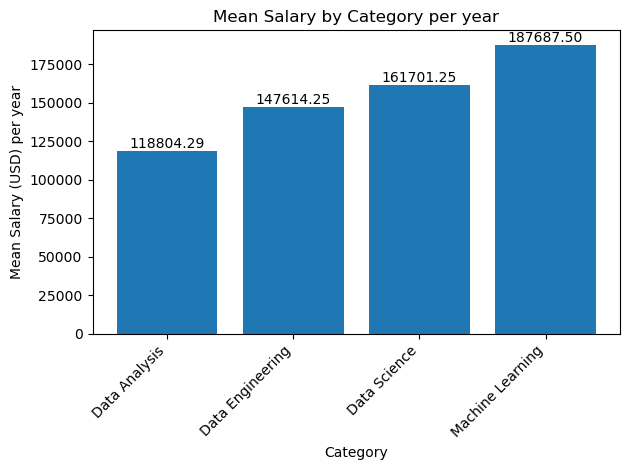

In [33]:
# Graph the result 

bars = plt.bar(mean_salary_cat['category'],mean_salary_cat['salary_in_usd'])

plt.xlabel('Category')
plt.ylabel('Mean Salary (USD) per year')
plt.title('Mean Salary by Category per year')
custom_labels = ['Data Analysis','Data Engineering', 'Data Science', 'Machine Learning']
plt.xticks(mean_salary_cat['category'], custom_labels, rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.savefig('Figures/JavierFig1.png', bbox_inches='tight')
plt.tight_layout()
plt.show()



Based on the provided information and analysis, we can draw the following conclusions regarding which category tends to make more money per year:

1. **Comparison of Mean Salaries by Category**: From the graph, it appears that machine learning-related job titles have the highest average salary, followed by data science, data engineering, and data analysis. This suggests that individuals in the machine learning category tend to earn more on average compared to other categories.

2. **Consideration of Specificity of Job Titles**: The categorization of job titles based on the number of entries (>20) helps to provide a more generalized view of salary trends across broader job categories. This approach allows for a comparison of more common job titles, providing insights into the overall salary trends within each category.

3. **Analysis of Standard Deviation**: The statistical analysis reveals that data engineering and data analysis categories have similar standard deviations, indicating similar levels of variability in salaries within these categories. Conversely, data science and machine learning categories exhibit greater variance in salaries, suggesting more variability in earnings within these categories.

4. **Inclusion of International Data**: Including data from other countries around the world provides additional variance in the statistical analysis, offering a broader perspective on salary trends across different regions.

Overall, based on the provided analysis, it can be concluded that machine learning-related job titles tend to have the highest average salaries, while data analysis and data engineering categories exhibit similar levels of variability in salaries. However, data science and machine learning categories show greater variability in earnings, possibly reflecting the diverse nature of roles and industries within these fields.


# Compare salaries between the United States and the rest of the countries in the dataset

In [7]:
# copy the DataFrame that contains category column
country_salaries_df = top_salaries_df.copy()

country_count_df = country_salaries_df.groupby('company_location').size().reset_index(name='count')
# Sort the values by highest count to lowest
country_count_df = country_count_df.sort_values(by='count', ascending=False)
# Export Result
country_count_df.to_csv('csv_output/country_count.csv', index=False)

In [8]:
# defined the function that will contain the api query to get the Lat and lon information
def get_coordinates(country_code):
    
    url = f'https://nominatim.openstreetmap.org/search?q={country_code}&format=jsonv2'
    
    response = requests.get(url).json()
    
    Lat = float(response[0]['lat'])
    Lon = float(response[0]['lon'])
    return Lat, Lon


In [9]:
#store the lat and lon numbers to the country count dataframe
country_count_df[['Latitude', 'Longitude']] = country_count_df['company_location'].apply(lambda x: pd.Series(get_coordinates(x)))

country_count_df.to_csv('csv_output/country_count_coord.csv')
country_count_df

,company_location,count,Latitude,Longitude
74,US,12975,39.783730,-100.445882
27,GB,655,54.702354,-3.276575
11,CA,392,61.066692,-107.991707
24,ES,127,39.326068,-4.837979
18,DE,98,51.163818,10.447831
...,...,...,...,...
29,GI,1,36.128593,-5.347476
10,BS,1,24.773655,-78.000055
21,EC,1,-1.339767,-79.366697
20,DZ,1,28.000027,2.999983


In [10]:
map_plot_1 = country_count_df.hvplot.points(
    x="Longitude",
    y="Latitude",
    size = "count",
    hover_cols=['company_location', 'Count'],
    geo=True,
    tiles = "OSM",
    color = 'company_location',
    width = 800,
    height = 600,
    alpha = 0.5
)

#hvplot.save(map_plot_1, 'Figures/JavierFig2.png')
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (company_location,count)

In [11]:
# Split Us salaries from the rest of the world and other 4 df from the top 5 
us_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'US']

not_us_salary_df = country_salaries_df[country_salaries_df['company_location'] != 'US']

gb_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'GB']

ca_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'CA']

es_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'ES']

de_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'DE']

In [57]:
# Analyse Us salaries compared to non Us salaries to see if the low count actually influence on the salaries

us_salary_df['salary_in_usd'].describe()

count     12975.000000
mean     157410.126474
std       66151.750528
min       20000.000000
25%      111600.000000
50%      148000.000000
75%      191475.000000
max      750000.000000
Name: salary_in_usd, dtype: float64

In [58]:
not_us_salary_df['salary_in_usd'].describe()

count      1863.000000
mean      97393.819646
std       65608.455145
min       15000.000000
25%       51676.000000
50%       79981.000000
75%      123040.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

In [12]:
mean_salary_us = us_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_us = mean_salary_us[mean_salary_us['category'] != 'Too specific title']

mean_salary_us

,category,salary_in_usd
1,data_analysis,123306.501201
2,data_engineering,153935.059665
3,data_science,169745.182171
4,machine_learning,195156.919210


In [13]:
mean_salary_not_us = not_us_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_not_us = mean_salary_not_us[mean_salary_not_us['category'] != 'Too specific title']

mean_salary_not_us

,category,salary_in_usd
1,data_analysis,86872.569343
2,data_engineering,95704.612500
3,data_science,99916.061567
4,machine_learning,131210.601810


In [15]:
mean_salary_gb = gb_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_gb = mean_salary_gb[mean_salary_gb['category'] != 'Too specific title']

mean_salary_gb

,category,salary_in_usd
1,data_analysis,88415.598985
2,data_engineering,88439.187845
3,data_science,101036.541667
4,machine_learning,133495.053571


In [16]:
mean_salary_ca = ca_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_ca = mean_salary_ca[mean_salary_ca['category'] != 'Too specific title']

mean_salary_ca

,category,salary_in_usd
1,data_analysis,118380.139535
2,data_engineering,147777.543210
3,data_science,153569.378788
4,machine_learning,175090.534483


In [17]:
mean_salary_es = es_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_es = mean_salary_es[mean_salary_es['category'] != 'Too specific title']

mean_salary_es

,category,salary_in_usd
1,data_analysis,41736.894737
2,data_engineering,65351.416667
3,data_science,54796.347826
4,machine_learning,69456.833333


In [18]:
mean_salary_de = de_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_de = mean_salary_de[mean_salary_de['category'] != 'Too specific title']

mean_salary_de

,category,salary_in_usd
1,data_analysis,64742.666667
2,data_engineering,85671.000000
3,data_science,73803.310345
4,machine_learning,130056.777778


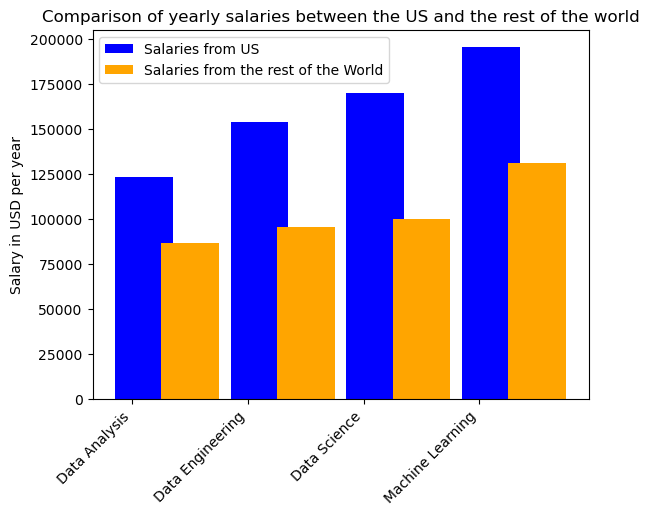

In [34]:
# Settings for the second graph which shows the salaries comparasion from the us and the rest of the world
index = np.arange(len(mean_salary_us['category']))
bar_width = 0.5
group_spacing = 0.2
custom_labels = ['Data Analysis','Data Engineering', 'Data Science', 'Machine Learning']

plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_not_us['salary_in_usd'],bar_width, color='orange', label='Salaries from the rest of the World')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and the rest of the world')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig2.png', bbox_inches='tight')
plt.show()

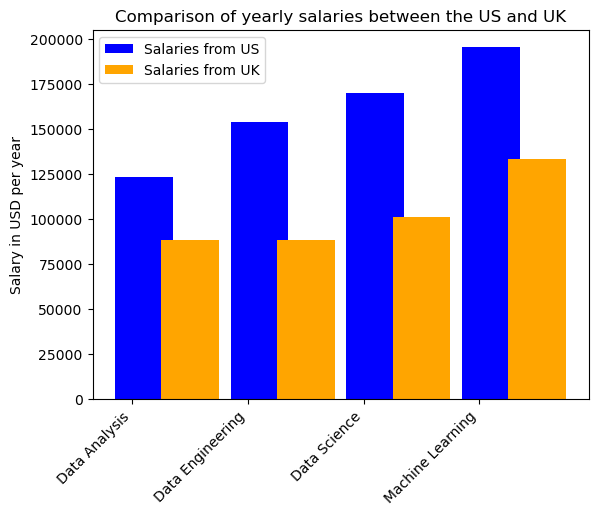

In [35]:
# Settings for the second graph which shows the salaries comparasion from the us and uk
plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_gb['salary_in_usd'],bar_width, color='orange', label='Salaries from UK')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and UK')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig3.png', bbox_inches='tight')
plt.show()

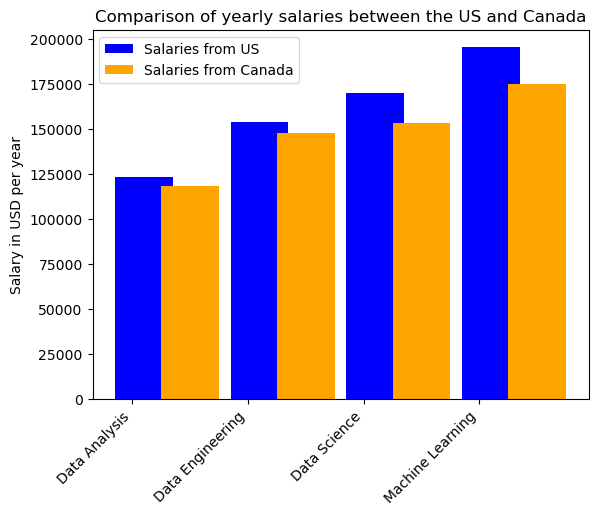

In [36]:
# Settings for the second graph which shows the salaries comparasion from the us and canada
plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_ca['salary_in_usd'],bar_width, color='orange', label='Salaries from Canada')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and Canada')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig4.png', bbox_inches='tight')
plt.show()

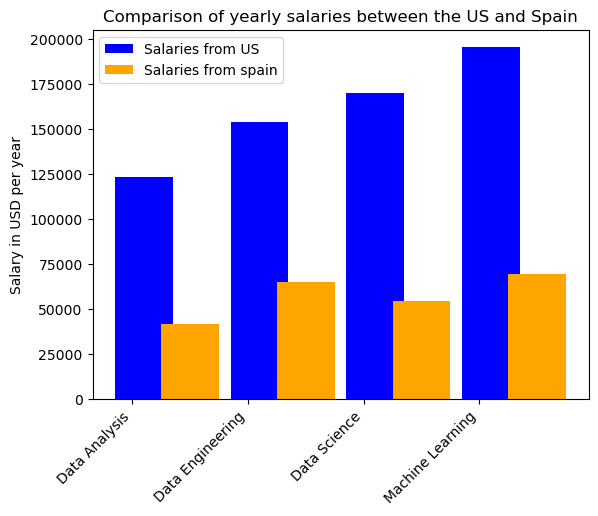

In [37]:
# Settings for the second graph which shows the salaries comparasion from the us and spain
plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_es['salary_in_usd'],bar_width, color='orange', label='Salaries from spain')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and Spain')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig5.png', bbox_inches='tight')
plt.show()

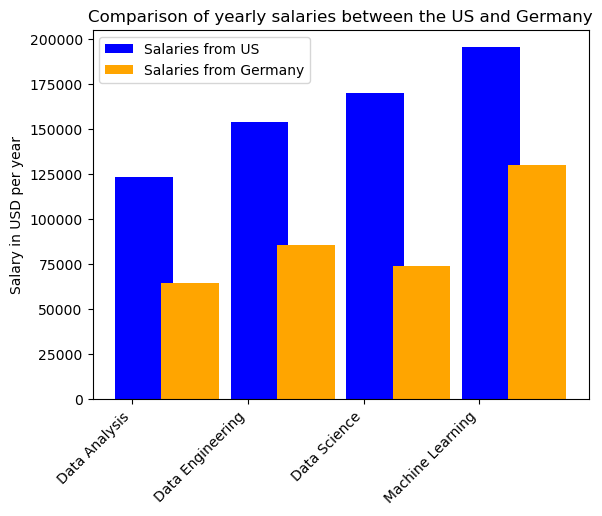

In [38]:
# Settings for the second graph which shows the salaries comparasion from the us and germany
plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_de['salary_in_usd'],bar_width, color='orange', label='Salaries from Germany')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and Germany')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig6.png', bbox_inches='tight')
plt.show()

**Comparison of US Salaries with Rest of the World**

In order to compare US salaries with those from the rest of the world, we initially observed a significant disparity in the number of entries, with the dataset predominantly comprising US salaries. This disparity was reflected in the initial bar graph showcasing a notable difference in mean salaries across the previously established four categories. The discrepancy observed might be attributed to variations in the cost of living across different countries, potentially influencing salary ranges.

To delve deeper into the comparison, we conducted additional analysis focusing on the top four countries following the US in terms of salary entries. It emerged that wages in European countries tended to be lower, while Canadian wages exhibited closer proximity to US salaries, despite all being considered first-world countries with high living costs.

Furthermore, a statistical examination of wages between US and non-US entries indicated that the standard deviation remained relatively unchanged. The distribution and variance appeared consistent, with the US exhibiting a standard deviation of $66,151 USD, while the rest of the world's wages had a standard deviation of $65,608 USD.

Graphical representations further reinforced these observations, revealing a consistent trend where wages across most categories mirrored the pattern observed in the initial analysis, with data analysis roles being the least remunerated and machine learning-related jobs emerging as the highest paid roles.

Overall, these findings underscore the complex interplay between geographical location, cost of living, and salary discrepancies, offering valuable insights into global wage disparities across various job categories.
